# Numeric Models

In [44]:
library(dplyr)
library(ggplot2)
library(tidyr) # you do not need to use this.

### Scientific notation in R

R uses scientific notation to denote both very large and very small numbers.

In [4]:
10^17

[1] 1e+17

In [6]:
1/10^17

[1] 1e-17

<div class="admonition warning" name="html-admonition">
<div class="title" style="background: pink; padding: 10px">Warning</div>
    <p>The 'e' used <code>1e+17</code> is not $e$, the base of the natural logarithm. Rather, it indicates the start of the <i>exponent</i> that should be applied to the number 10. </p>
</div>

In [7]:
3e-2

[1] 0.03

In [8]:
3*10^(-2)

[1] 0.03

When we check our models against manual computations, we will get differences that are very close but not quite zero. Difference from zero is due to rounding errors. 

## Linear models

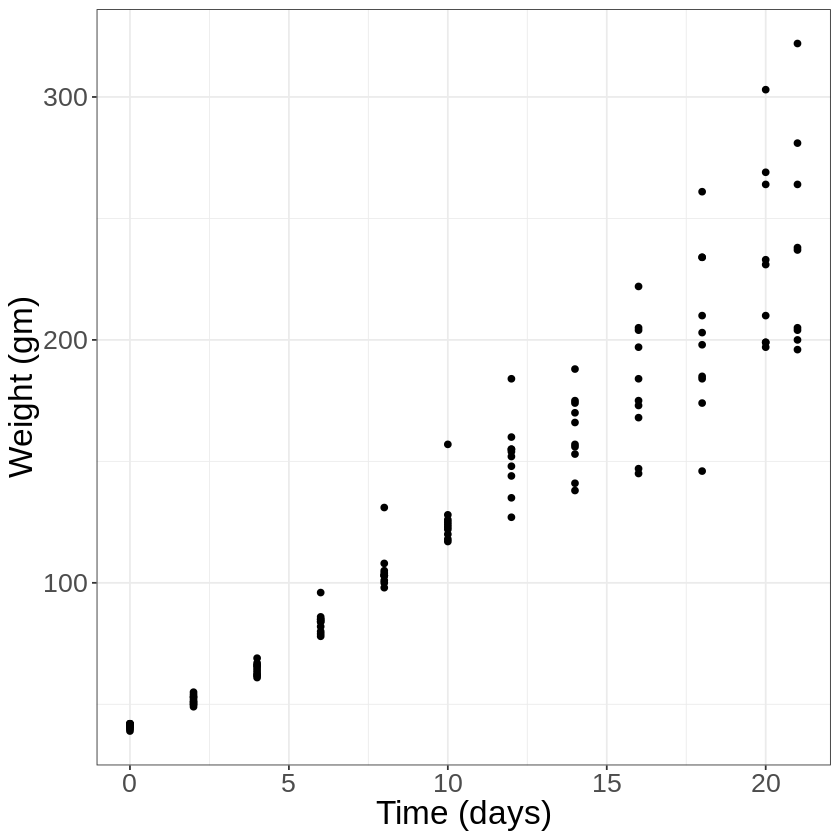

In [131]:
Diet4 <- filter(ChickWeight, Diet == 4)
plot1 <- ggplot(Diet4, aes(x = Time, y = weight)) +
    geom_point() + 
    labs(x = 'Time (days)', y= 'Weight (gm)')+
    theme_bw() +
    theme(text = element_text(size=20))
plot1

In [132]:
linear <- lm(formula = weight ~ Time, data = Diet4) # weight as linear func of time
linear


Call:
lm(formula = weight ~ Time, data = Diet4)

Coefficients:
(Intercept)         Time  
     30.792        9.714  


In [133]:
C <- linear$coefficients[[1]] # intercept
A <- linear$coefficients[[2]] # slope
C
A

[1] 30.79212

[1] 9.714366

In [134]:
w <- function(t){
   A*t + C
}

# test values
w(0) == C
w(1) == A + C

# w(t) = predicted weight on day t

[1] TRUE

[1] TRUE

In [135]:
# fitted values are w(t)
linear$fitted.values - w(Diet4$Time) # very small numbers!

1             2             3             4             5 
-5.826450e-13 -1.847411e-13 -4.263256e-14 -4.263256e-14 -2.842171e-14 
            6             7             8             9            10 
-4.263256e-14 -2.842171e-14  0.000000e+00 -2.842171e-14 -2.842171e-14 
           11            12            13            14            15 
-2.842171e-14 -2.842171e-14 -4.263256e-14 -2.842171e-14 -2.842171e-14 
           16            17            18            19            20 
-4.263256e-14 -2.842171e-14 -4.263256e-14 -2.842171e-14  0.000000e+00 
           21            22            23            24            25 
-2.842171e-14 -2.842171e-14 -2.842171e-14 -2.842171e-14 -4.263256e-14 
           26            27            28            29            30 
-2.842171e-14 -4.263256e-14 -4.263256e-14 -2.842171e-14 -4.263256e-14 
           31            32            33            34            35 
-2.842171e-14  0.000000e+00 -2.842171e-14 -2.842171e-14 -2.842171e-14 
           36            37            38            39            40 
-2.842171e-14 -4.263256e-14 -2.842171e-14 -4.263256e-14 -4.263256e-14 
           41            42            43            44            45 
-2.842171e-14 -4.263256e-14 -2.842171e-14  0.000000e+00 -2.842171e-14 
           46            47            48            49            50 
-2.842171e-14 -4.263256e-14 -2.842171e-14 -2.842171e-14 -4.263256e-14 
           51            52            53            54            55 
-2.842171e-14 -4.263256e-14 -2.842171e-14  0.000000e+00 -2.842171e-14 
           56            57            58            59            60 
-2.842171e-14 -2.842171e-14 -2.842171e-14 -4.263256e-14 -2.842171e-14 
           61            62            63            64            65 
-2.842171e-14 -4.263256e-14 -2.842171e-14 -4.263256e-14 -2.842171e-14 
           66            67            68            69            70 
 0.000000e+00 -2.842171e-14 -2.842171e-14 -2.842171e-14 -2.842171e-14 
           71            72            73            74            75 
-4.263256e-14 -2.842171e-14 -4.263256e-14 -4.263256e-14 -2.842171e-14 
           76            77            78            79            80 
-4.263256e-14 -2.842171e-14  0.000000e+00 -2.842171e-14 -2.842171e-14 
           81            82            83            84            85 
-2.842171e-14 -2.842171e-14 -4.263256e-14 -2.842171e-14 -2.842171e-14 
           86            87            88            89            90 
-4.263256e-14 -2.842171e-14 -4.263256e-14 -2.842171e-14  0.000000e+00 
           91            92            93            94            95 
-2.842171e-14 -2.842171e-14 -2.842171e-14 -2.842171e-14 -4.263256e-14 
           96            97            98            99           100 
-2.842171e-14 -4.263256e-14 -4.263256e-14 -2.842171e-14 -4.263256e-14 
          101           102           103           104           105 
-2.842171e-14  0.000000e+00 -2.842171e-14 -2.842171e-14 -2.842171e-14 
          106           107           108           109           110 
-2.842171e-14 -4.263256e-14 -2.842171e-14 -4.263256e-14 -4.263256e-14 
          111           112           113           114           115 
-2.842171e-14 -4.263256e-14 -2.842171e-14  0.000000e+00 -2.842171e-14 
          116           117           118 
-2.842171e-14 -2.842171e-14 -2.842171e-14

In [35]:
sum(abs(linear$fitted.values - w(Diet4$Time)) < 10^(-10)) == nrow(Diet4)

[1] TRUE

The fitted values provided by `lm()` are within $10^{-10}$ of those we compute using the coefficients provided by `lm()`.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



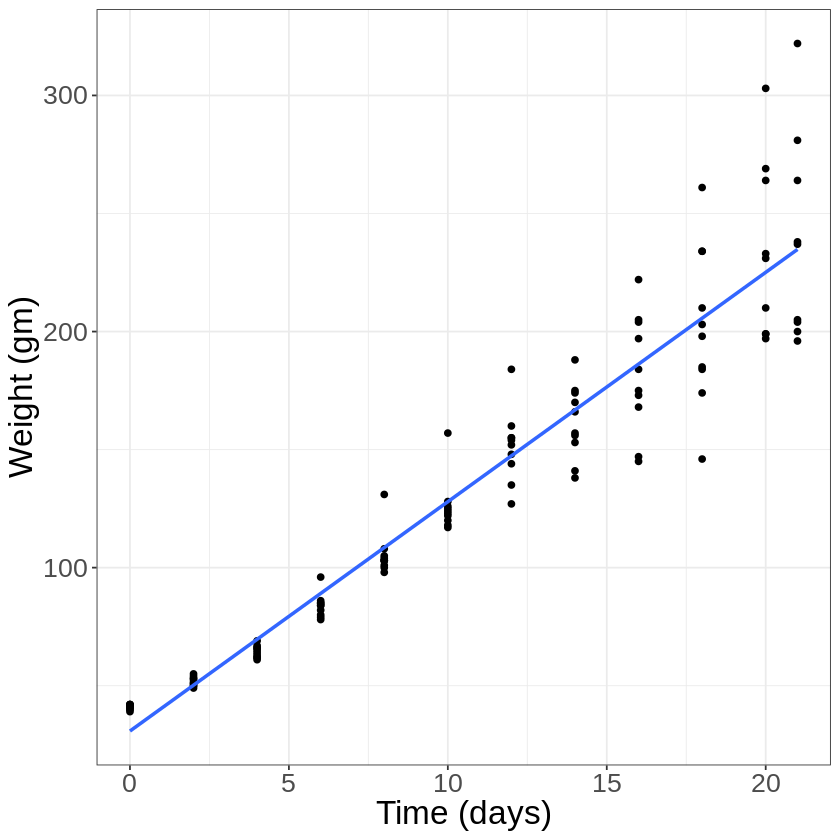

In [45]:
plot1 + geom_smooth(mapping = aes(x = Time, y = linear$fitted.values))

### Mean squared error

In [136]:
# (Diet4$weight - linear$fitted.values) manually comput the residuals; actual - pred
linear$residuals - (Diet4$weight - linear$fitted.values) # VERY small

1             2             3             4             5 
 1.776357e-15 -3.330669e-15 -6.217249e-15  4.440892e-15  8.881784e-16 
            6             7             8             9            10 
-2.664535e-15 -1.776357e-15  1.421085e-14 -3.552714e-15  3.552714e-15 
           11            12            13            14            15 
-7.105427e-15 -3.552714e-15  1.776357e-15  1.998401e-15  8.881784e-16 
           16            17            18            19            20 
 4.440892e-15  8.881784e-16 -2.442491e-15 -1.776357e-15  1.332268e-14 
           21            22            23            24            25 
-1.065814e-14 -3.552714e-15 -7.105427e-15  0.000000e+00  1.776357e-15 
           26            27            28            29            30 
 1.776357e-15 -5.995204e-15  4.440892e-15  0.000000e+00 -3.552714e-15 
           31            32            33            34            35 
 0.000000e+00  1.065814e-14 -1.065814e-14 -8.881784e-16 -7.105427e-15 
           36            37            38            39            40 
 0.000000e+00  1.776357e-15  2.109424e-15 -6.217249e-15  4.440892e-15 
           41            42            43            44            45 
 8.881784e-16 -3.552714e-15 -3.552714e-15  1.065814e-14  0.000000e+00 
           46            47            48            49            50 
 7.105427e-15  1.776357e-15  2.220446e-15  1.776357e-15  5.329071e-15 
           51            52            53            54            55 
 1.776357e-15 -3.552714e-15 -3.552714e-15  1.065814e-14  0.000000e+00 
           56            57            58            59            60 
 3.552714e-15 -7.105427e-15  0.000000e+00  1.776357e-15  1.998401e-15 
           61            62            63            64            65 
 8.881784e-16  4.440892e-15  8.881784e-16 -4.440892e-15 -1.776357e-15 
           66            67            68            69            70 
 1.421085e-14 -3.552714e-15 -8.881784e-16 -9.769963e-15 -3.996803e-15 
           71            72            73            74            75 
 1.776357e-15  2.220446e-15 -6.217249e-15  5.329071e-15  1.776357e-15 
           76            77            78            79            80 
-2.664535e-15 -1.776357e-15  1.421085e-14 -3.552714e-15  3.552714e-15 
           81            82            83            84            85 
-5.329071e-15 -3.552714e-15  1.776357e-15  2.220446e-15  8.881784e-16 
           86            87            88            89            90 
 5.329071e-15  8.881784e-16 -2.664535e-15 -1.776357e-15  1.332268e-14 
           91            92            93            94            95 
-7.105427e-15  0.000000e+00  0.000000e+00 -1.421085e-14  1.776357e-15 
           96            97            98            99           100 
 2.220446e-15 -6.217249e-15  4.440892e-15  6.661338e-16 -2.678413e-15 
          101           102           103           104           105 
-1.776357e-15  1.376677e-14 -4.440892e-15 -8.881784e-16 -9.769963e-15 
          106           107           108           109           110 
-3.996803e-15  1.776357e-15  1.776357e-15 -6.217249e-15  4.440892e-15 
          111           112           113           114           115 
 8.881784e-16 -2.664535e-15 -8.881784e-15  8.881784e-15 -1.065814e-14 
          116           117           118 
-3.552714e-15 -7.105427e-15 -1.065814e-14

In [53]:
sum(abs(linear$residuals - (Diet4$weight - linear$fitted.values))<10^(-10)) == nrow(Diet4)
sum(abs(linear$residuals - (Diet4$weight - w(Diet4$Time))<10^(-10))) == nrow(Diet4)

[1] TRUE

[1] TRUE

The residuals given by `lm()` are within $10^{-10}$ of the residuals we compute. 

In [46]:
mean(linear$residuals^2)

[1] 441.1489

In [47]:
mean(abs(linear$residuals))

[1] 14.17788

## Quadratic models

In [138]:
quadratic <- lm(formula = weight ~ Time + I(Time^2), data = Diet4)
# weight is a linear function of both time and time^2
quadratic


Call:
lm(formula = weight ~ Time + I(Time^2), data = Diet4)

Coefficients:
(Intercept)         Time    I(Time^2)  
   37.06515      7.75821      0.09184  


In [139]:
C <- quadratic$coefficients[[1]]
B <- quadratic$coefficients[[2]]
A <- quadratic$coefficients[[3]]
C
B
A

[1] 37.06515

[1] 7.758214

[1] 0.09184135

In [142]:
# weight as a linear function of both time and time^2
quad_model <- function(t){
    C + B*t + A*t^2 # = predicted weight
}

quad_model(0)
quad_model(3) # predicted weight on day three

[1] 37.06515

[1] 61.16636

In [143]:
quadratic$fitted.values - quad_model(Diet4$Time)

1             2             3             4             5 
-6.110668e-13 -1.421085e-13 -5.684342e-14 -4.263256e-14 -5.684342e-14 
            6             7             8             9            10 
-4.263256e-14 -2.842171e-14 -2.842171e-14 -2.842171e-14 -2.842171e-14 
           11            12            13            14            15 
-5.684342e-14 -5.684342e-14 -4.263256e-14 -2.842171e-14 -4.263256e-14 
           16            17            18            19            20 
-4.263256e-14 -5.684342e-14 -4.263256e-14 -2.842171e-14 -2.842171e-14 
           21            22            23            24            25 
-2.842171e-14 -2.842171e-14 -5.684342e-14 -5.684342e-14 -4.263256e-14 
           26            27            28            29            30 
-2.842171e-14 -4.263256e-14 -4.263256e-14 -5.684342e-14 -5.684342e-14 
           31            32            33            34            35 
-5.684342e-14 -2.842171e-14 -2.842171e-14 -2.842171e-14 -5.684342e-14 
           36            37            38            39            40 
-5.684342e-14 -4.263256e-14 -2.842171e-14 -4.263256e-14 -4.263256e-14 
           41            42            43            44            45 
-5.684342e-14 -4.263256e-14 -2.842171e-14 -2.842171e-14 -2.842171e-14 
           46            47            48            49            50 
-2.842171e-14 -4.263256e-14 -2.842171e-14 -4.263256e-14 -4.263256e-14 
           51            52            53            54            55 
-4.263256e-14 -4.263256e-14 -2.842171e-14 -2.842171e-14 -2.842171e-14 
           56            57            58            59            60 
-2.842171e-14 -5.684342e-14 -5.684342e-14 -4.263256e-14 -2.842171e-14 
           61            62            63            64            65 
-4.263256e-14 -4.263256e-14 -4.263256e-14 -4.263256e-14 -2.842171e-14 
           66            67            68            69            70 
-2.842171e-14 -2.842171e-14 -2.842171e-14 -5.684342e-14 -5.684342e-14 
           71            72            73            74            75 
-4.263256e-14 -2.842171e-14 -4.263256e-14 -4.263256e-14 -4.263256e-14 
           76            77            78            79            80 
-4.263256e-14 -2.842171e-14 -2.842171e-14 -2.842171e-14 -2.842171e-14 
           81            82            83            84            85 
-5.684342e-14 -5.684342e-14 -4.263256e-14 -2.842171e-14 -4.263256e-14 
           86            87            88            89            90 
-4.263256e-14 -4.263256e-14 -4.263256e-14 -2.842171e-14 -2.842171e-14 
           91            92            93            94            95 
-2.842171e-14 -2.842171e-14 -5.684342e-14 -5.684342e-14 -4.263256e-14 
           96            97            98            99           100 
-2.842171e-14 -4.263256e-14 -4.263256e-14 -4.263256e-14 -4.263256e-14 
          101           102           103           104           105 
-2.842171e-14 -2.842171e-14 -2.842171e-14 -2.842171e-14 -5.684342e-14 
          106           107           108           109           110 
-5.684342e-14 -4.263256e-14 -2.842171e-14 -4.263256e-14 -4.263256e-14 
          111           112           113           114           115 
-4.263256e-14 -4.263256e-14 -2.842171e-14 -2.842171e-14 -2.842171e-14 
          116           117           118 
-2.842171e-14 -5.684342e-14 -5.684342e-14

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



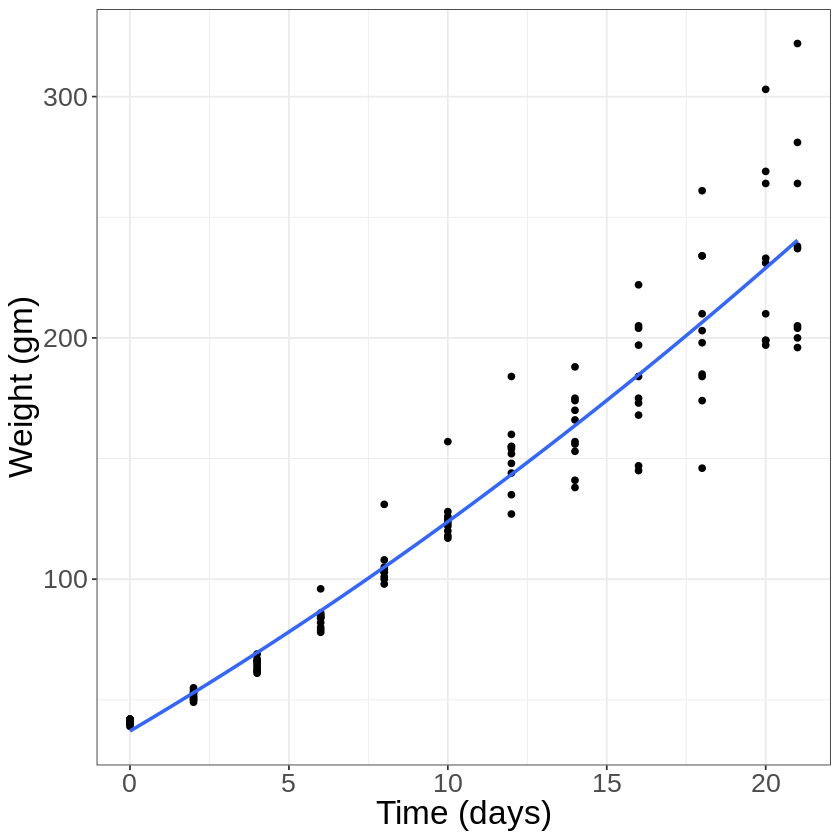

In [141]:
plot1 + geom_smooth(mapping = aes(x = Time, y = quadratic$fitted.values))

## Exponential models

### Exponentials and logarithms in R

#### Exponential function

In R, we use `exp(x)` to compute $e^x$.

In [9]:
exp(0) # e^0 = 1

[1] 1

In [10]:
exp(1) # e^1 = e

[1] 2.718282

#### Logarithm function

<div class="admonition warning" name="html-admonition">
<div class="title" style="background: pink; padding: 10px">Warning</div>
    <p>In R, <b><code>log()</code> is the natural logarithm</b> which is sometimes denoted by $\ln()$ or $\log_e()$. For consistency, we will also use $\log()$ to refer to the natural logarithm. </p>
</div>

In [13]:
log(1) # what exponent do I raise e to to get 1?

[1] 0

In [12]:
log(2.71828182845905) # what exponent do I raise e to to get e?

[1] 1

### Mathematical background

By the definition of the natural logarithm, we have that
$\log(e^{x}) = x$.
It follows that
$$\log \left(e^{Ax + C}\right) = Ax + C.$$

<div class="admonition note" name="html-admonition">
<div class="title" style="background: lightblue; padding: 10px">Note</div>
    <p>Applying <code>log()</code> to the outputs of an exponential function transforms it into a linear function.</p>
</div>

In [ ]:
# create data for the function e^(x/3 + 7)
exp_example <- data.frame(x_values = 1:30) %>%
    mutate(y_values = exp((1/3)*x_values + 7), # y = e^(x/3 + 7)
           log_y = log(y_values), # log(y)
           line = (1/3)*x_values + 7 # x/3 + 7
          )

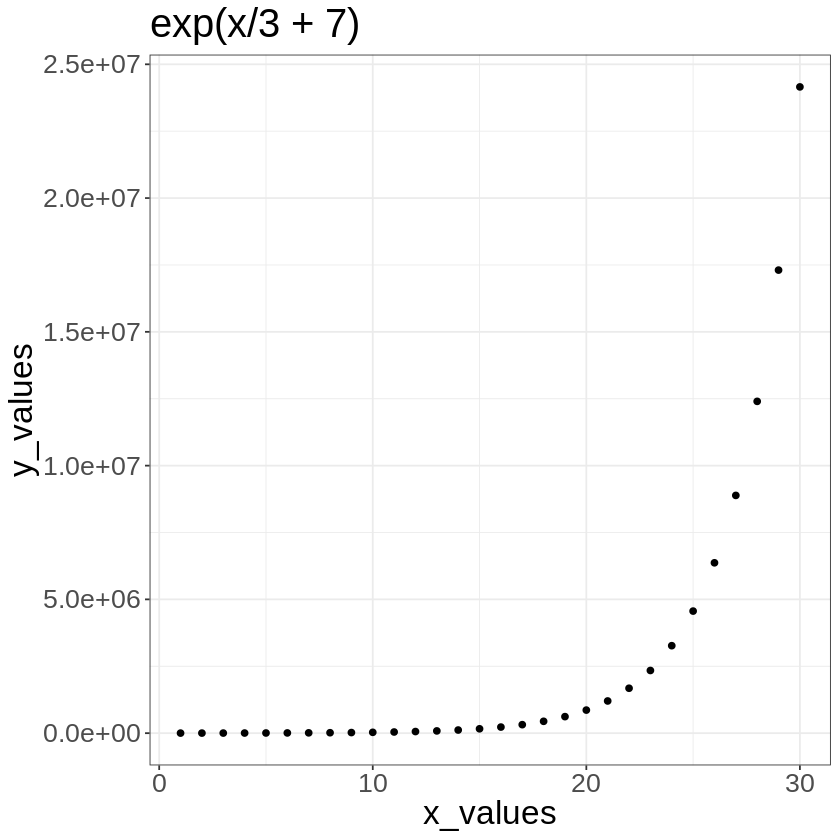

In [110]:
# plot data
ggplot(exp_example, aes(x=x_values, y=y_values)) +
    geom_point() + 
    labs(title = 'exp(x/3 + 7)')+
    theme_bw() +
    theme(text = element_text(size=20))

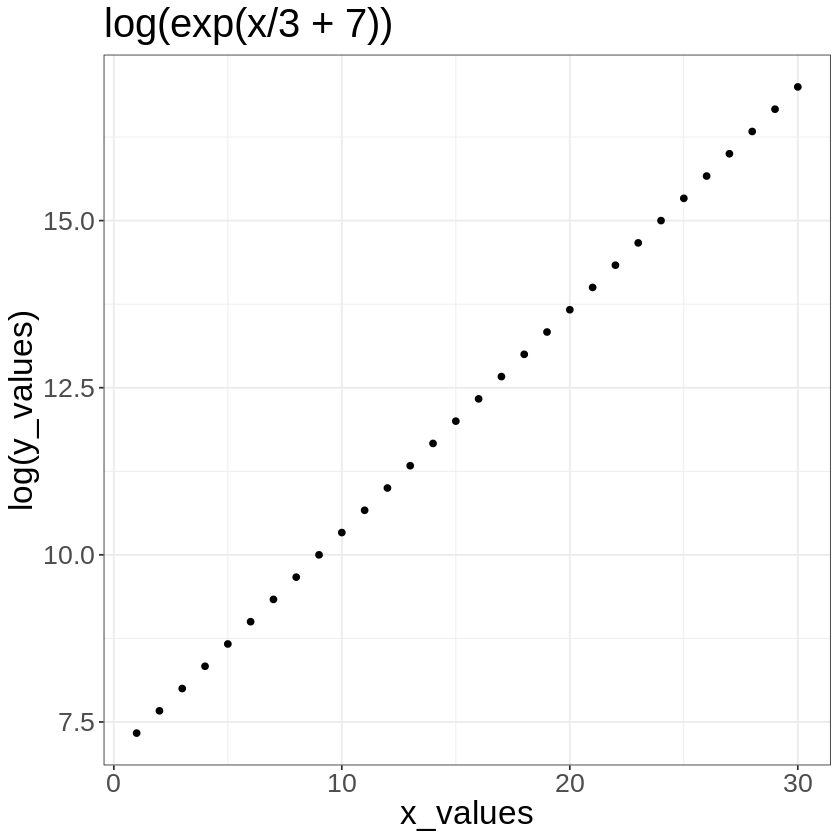

In [145]:
# check that this is exponential by applying log to the outputs
ggplot(exp_example, aes(x=x_values, y=log(y_values))) + # <- change
    geom_point() + 
    labs(title = 'log(exp(x/3 + 7))')+
    theme_bw() +
    theme(text = element_text(size=20))

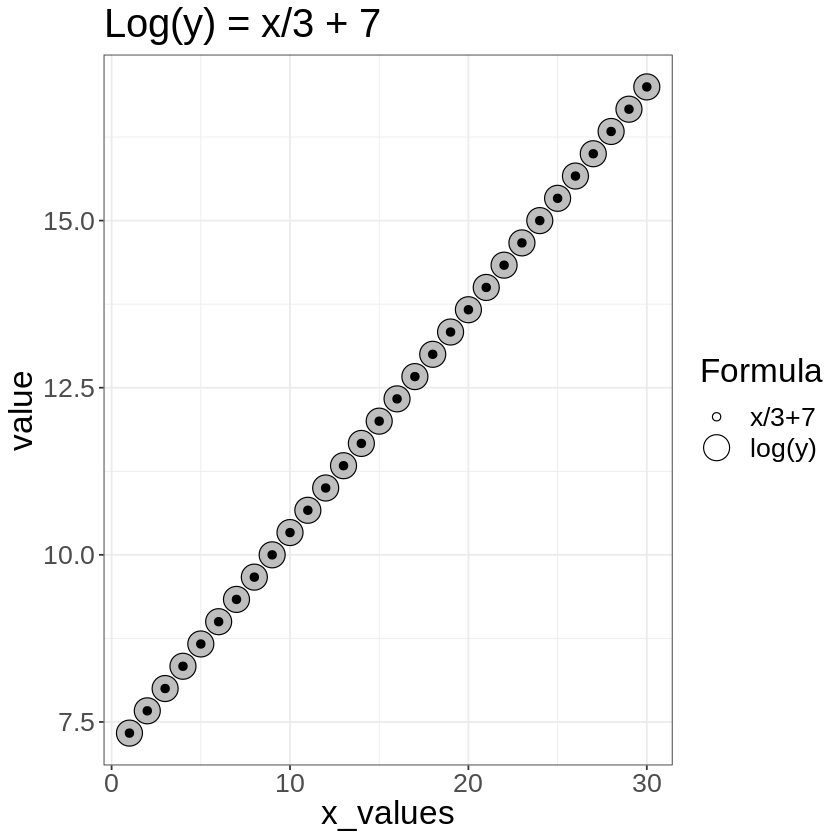

In [118]:
# plot line and log of the outputs
exp_example %>%
    pivot_longer(-x_values, 'formula')  %>%
    filter(formula %in% c('log_y', 'line')) %>%
    ggplot(aes(x=x_values, y = value, 
                fill = formula, size = formula
              ),
          ) +
        geom_point(shape = 21, color = 'black') + 
        scale_fill_manual(values = c('black', 'grey')) + 
        scale_size_manual(name = 'Formula', 
                            values = c(2,7),
                          labels = c('x/3+7', 'log(y)')
                         ) +
        labs(title = 'Log(y) = x/3 + 7') +
        guides(fill = 'none') +
        theme_bw() +
        theme(text = element_text(size=20))

### Using `lm()` to find an exponential model

In [112]:
exp_model <- lm(formula = log(y_values) ~ x_values,
                # log(y) is a linear function of x
                data = exp_example
               )
exp_model


Call:
lm(formula = log(y_values) ~ x_values, data = exp_example)

Coefficients:
(Intercept)     x_values  
     7.0000       0.3333  


As expected the slope is 1/3 and the intercept is 7. Line is given by $$y = x/3 + 7$$.

<div class="admonition warning" name="html-admonition">
<div class="title" style="background: pink; padding: 10px">Warning</div>
    <p>When using a formula of the from <code>log(y) ~ x</code>, the fitted values are predictions of $log(y)$ rather than $y$. <b>To plot the predicted $y$-values, apply <code>exp()</code> to the fitted values.</b></p>
<p>        <code> exp(log(y)) = y </code></p>
</div>

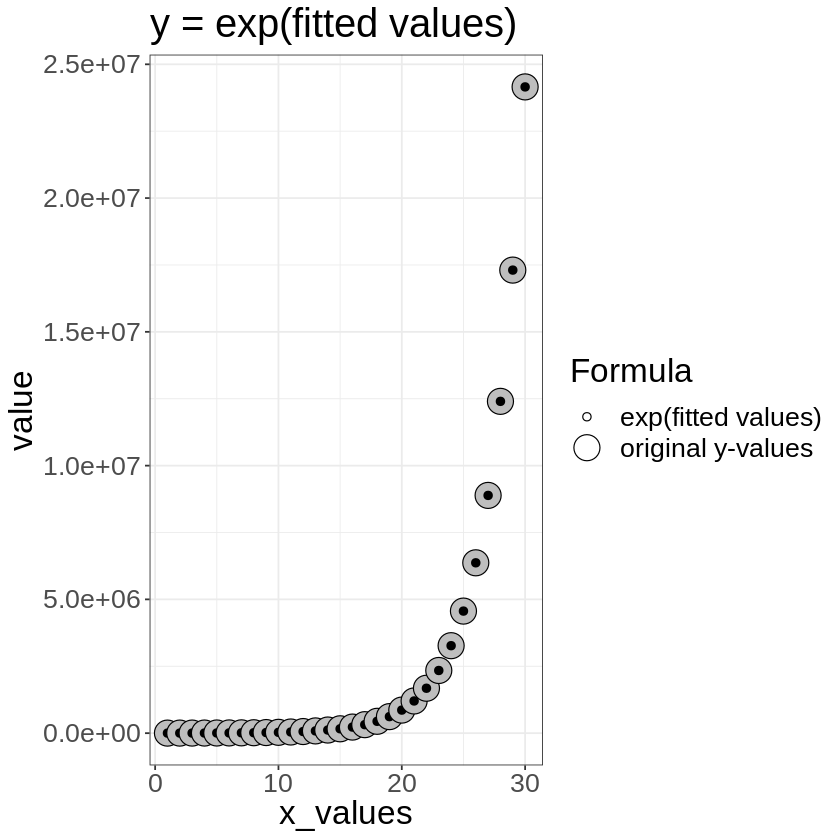

In [117]:
# Plot to show y = exp (fitted values)
exp_example %>%
    mutate(predictions = exp(exp_model$fitted.values)) %>%
    pivot_longer(-x_values, 'formula')  %>%
    filter(formula %in% c('y_values', 'predictions')) %>%
    ggplot(aes(x=x_values, y = value, 
                fill = formula, size = formula
              ),
          ) +
        geom_point(shape = 21, color = 'black') + 
        scale_fill_manual(values = c('black', 'grey')) + 
        scale_size_manual(name = 'Formula', 
                            values = c(2,7),
                          labels = c('exp(fitted values)', 
                              'original y-values'
                         )
                         ) +
        labs(title = 'y = exp(fitted values)') +
        guides(fill = 'none') +
        theme_bw() +
        theme(text = element_text(size=20))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



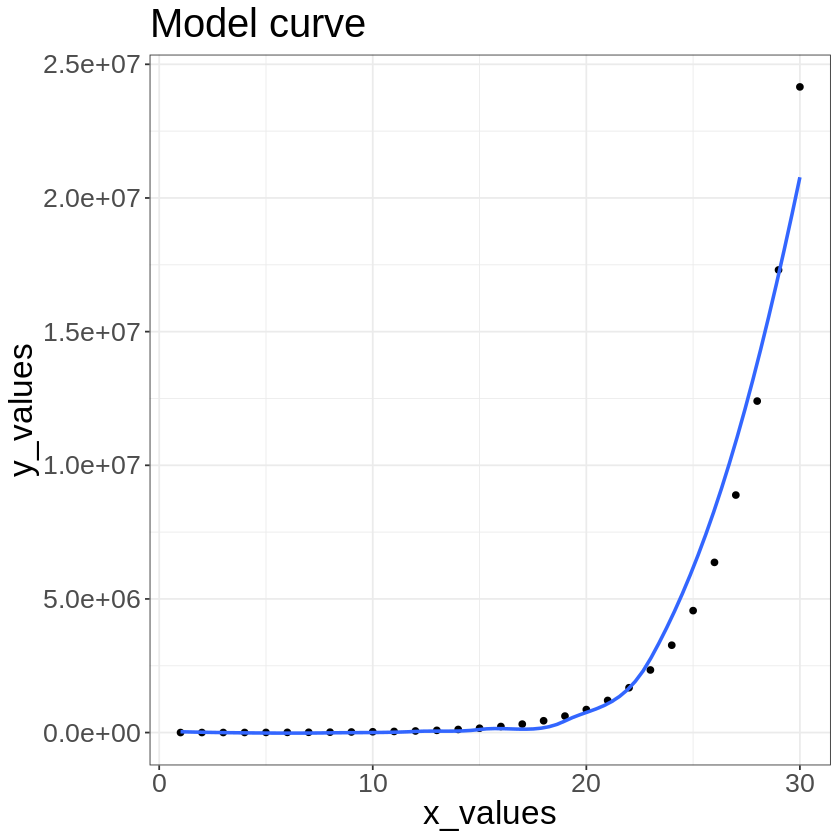

In [146]:
# Plot original values and model curve
ggplot(exp_example, aes(x = x_values)) + 
    geom_point(mapping= aes(y=y_values)) +
    geom_smooth(mapping = aes(
                y= exp(exp_model$fitted.values) #<- fitted vals are log(y)
        # different from linear and quadraditc
                ), 
                se = FALSE) +
    labs(title = 'Model curve') +
    theme_bw() +
    theme(text = element_text(size=20))

### Mean squared error

<div class="admonition warning" name="html-admonition">
<div class="title" style="background: pink; padding: 10px">Warning</div>
    <p>The residuals are measuring the difference between log(y) and the predicted value of log(y). We want the difference between y and predicted y. </p>
</div>

In [148]:
# predicted y values use exp(exp_model$fitted.values)
# actual residuals are
exp_example$y_values - exp(exp_model$fitted.values)
# small as expected

1             2             3             4             5 
-6.821210e-12  1.136868e-11  0.000000e+00  7.275958e-12  0.000000e+00 
            6             7             8             9            10 
 0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 -5.456968e-11 
           11            12            13            14            15 
 0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 
           16            17            18            19            20 
 0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 
           21            22            23            24            25 
 0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 
           26            27            28            29            30 
 0.000000e+00  1.490116e-08  0.000000e+00  0.000000e+00  0.000000e+00